In [44]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [45]:
df = pd.read_csv('datasetUL.csv', index_col=0)
df

,gender,age,annual_income,spending_score,perf_shop_meth,member_level
id,,,,,,
1,Female,48,29189.97,90,InStore,none
2,Female,40,10242.24,39,InStore,gold
3,Male,71,20388.37,48,InStore,silver
4,Female,72,57062.15,43,InStore,none
5,Agender,81,64736.13,44,InStore,gold
...,...,...,...,...,...,...
29996,Male,64,44506.93,50,InStore,gold
29997,Female,44,77084.87,41,InStore,none
29998,Agender,42,75164.74,40,InStore,none


In [46]:
df[['age', 'annual_income', 'spending_score']].std()

age                  19.189775
annual_income     24845.521945
spending_score       17.321256
dtype: float64

([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, 'Female'),
  Text(1, 0, 'Male'),
  Text(2, 0, 'Agender'),
  Text(3, 0, 'Genderfluid'),
  Text(4, 0, 'Bigender'),
  Text(5, 0, 'Polygender'),
  Text(6, 0, 'Non-binary'),
  Text(7, 0, 'Genderqueer')])

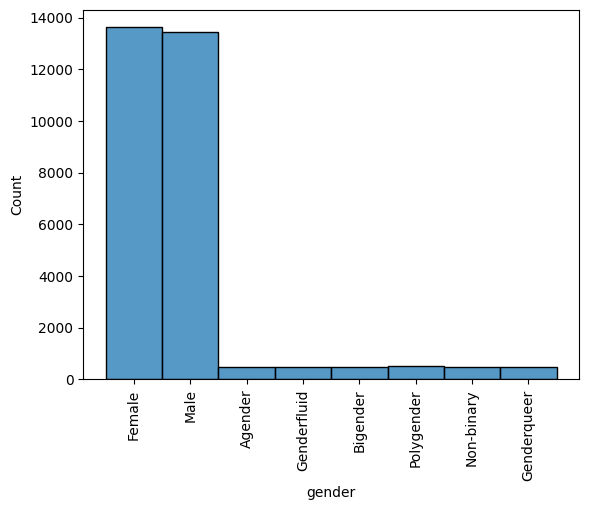

In [47]:
sns.histplot(x='gender', data=df)
plt.xticks(rotation=90)

([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, 'Female'),
  Text(1, 0, 'Male'),
  Text(2, 0, 'Agender'),
  Text(3, 0, 'Genderfluid'),
  Text(4, 0, 'Bigender'),
  Text(5, 0, 'Polygender'),
  Text(6, 0, 'Non-binary'),
  Text(7, 0, 'Genderqueer')])

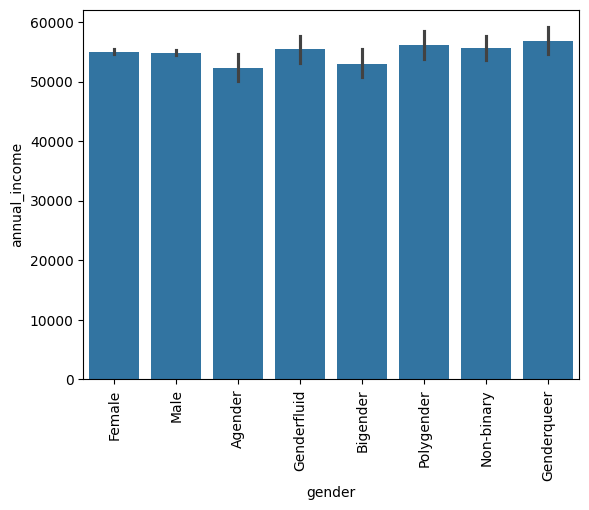

In [48]:
sns.barplot(x='gender', y='annual_income', data=df)
plt.xticks(rotation=90)

([0], [Text(0, 0, '')])

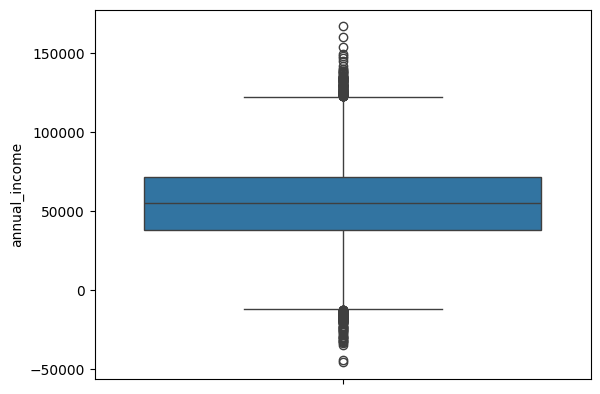

In [49]:
sns.boxplot(y='annual_income', data=df)
plt.xticks(rotation=90)

In [50]:
df = df.dropna()
df

,gender,age,annual_income,spending_score,perf_shop_meth,member_level
id,,,,,,
1,Female,48,29189.97,90,InStore,none
2,Female,40,10242.24,39,InStore,gold
3,Male,71,20388.37,48,InStore,silver
4,Female,72,57062.15,43,InStore,none
5,Agender,81,64736.13,44,InStore,gold
...,...,...,...,...,...,...
29996,Male,64,44506.93,50,InStore,gold
29997,Female,44,77084.87,41,InStore,none
29998,Agender,42,75164.74,40,InStore,none


In [56]:
df = df[df['annual_income'] < 0]
df = df[df['annual_income'] <= 12500]
df2 = df[df['gender'].isin(['Male', 'Female'])]
df_onehot = pd.get_dummies(df2.drop('gender', axis=1))
df_onehot

,age,annual_income,spending_score,perf_shop_meth_BOPS,perf_shop_meth_InStore,perf_shop_meth_Online,member_level_gold,member_level_none,member_level_platinum,member_level_silver
id,,,,,,,,,,
166,68,-14212.89,65,False,False,True,False,False,False,True
210,62,-19190.17,75,False,True,False,False,True,False,False
232,71,-7980.41,77,False,False,True,False,False,False,True
240,49,-4315.66,41,False,False,True,False,False,True,False
489,64,-1718.07,67,False,True,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...
29495,42,-14643.20,85,False,False,True,False,False,True,False
29582,60,-20389.46,74,False,True,False,False,True,False,False
29588,19,-6919.43,80,False,True,False,False,False,False,True


In [57]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2)
kmeans.fit(df_onehot)
kmeans.labels_


array([0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1,

In [62]:
genders = pd.get_dummies(df2['gender'])
genders['cluster'] = kmeans.labels_
genders

,Female,Male,cluster
id,,,
166,True,False,0
210,False,True,0
232,True,False,1
240,False,True,1
489,False,True,1
...,...,...,...
29495,False,True,0
29582,True,False,0
29588,True,False,1
